# OM Oxidation with Carbon Release from Soil
Assumptions:
Carbon Type = Generic CH20
Carbon Size = Bulk (i.e., Large Size Fraction Values)
Microbial Reaction = Monod

# Import Libraries

In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import Layout, Box, Label, RadioButtons, Tab, HBox, VBox, Accordion, Select, interactive, Dropdown, interact
import subprocess
import sys
import os

# Simulation Files 

In [2]:
# PFLOTRAN INPUT DECK FILE NAME
#PF_input_filename = "OM_oxidation_bulk_generic_soil_release"
PF_input_filename = "OM_oxidation_bulk_generic_soil_norelease"
# EXPERIMENTAL DATA FILE
df = pd.read_excel("OWC_WC_OXNIC.xlsx")

# PFLOTRAN OUTPUT FILENAME FOR PLOTTING
filename = './OM_oxidation_bulk_generic_soil_norelease-obs-0.pft'

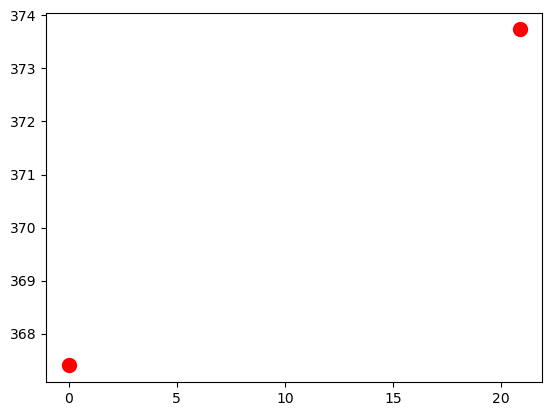

In [3]:
plt.scatter(df['Time-Csolid [d]'], df['Csolid [umol/L]'], marker = 'o', c= 'r' , s= 100)

# Copy over PFLOTRAN files (if needed)

In [4]:
#import subprocess
#import shutil
#shutil.copy("/software/pflotran/regression_tests/default/batch/cybernetic.py",".")
#shutil.copy("/software/pflotran/database/cybernetic.dat",".")

# Run PFLOTRAN & write output files

In [5]:
fout = open("OM_oxidation_bulk_generic_soil_norelease.stdout","w")
subprocess.run(["pflotran","-input_prefix",PF_input_filename],stdout=fout, stderr=fout)
fout.close()

# Plot Results Against Experimental Data

# Better Plots

In [6]:
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')

import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')

#import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

path = []
path.append('.')



In [7]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (20,15))
plt.rcParams.update({'font.size': 25})
plt.rc('axes', labelsize = 25)

############### SOLID Carbon Plots ###############
icol = []
icol.append(3)

for i in range(len(icol)):
     data = pft.Dataset(filename,1,icol[i])
     ax[0][0].plot(data.get_array('x'),data.get_array('y')*1000000, label = 'Solid Carbon', linewidth=3)

ax[0][0].scatter(df['Time-Csolid [d]'], df['Csolid [umol/L]'], marker = 'o', c= 'r' , s= 100)
ax[0][0].set_title('Solid Phase Carbon')
ax[0][0].set_ylabel('Solid Carbon Concentration [uM]')
ax[0][0].set_xlabel('Time [d]')
ax[0][0].ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
ax[0][0].legend(loc =0 )

############### AQUEOUS Carbon Plots ###############
icol = []
icol.append(4)
label = ['TOC']

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
  #plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=3)
  ax[0][1].plot(data.get_array('x'),data.get_array('y')*1000000,label=label[i], linewidth=5)

ax[0][1].scatter(df['Time-TOC [d]'], df['Total TOC [umol/L]-Large'], marker = 'o', c= 'r' , s= 100)
ax[0][1].set_title('TOC')
ax[0][1].set_ylabel('TOC [uM]')
ax[0][1].set_xlabel('Time [d]')
#ax[0][1].ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
ax[0][1].legend(loc =0)

################## AQ CHEM Plot ####################
icol = []
icol.append(5)
icol.append(6)
icol.append(7)
#icol.append(8)
#icol.append(9)
icol.append(10)
icol.append(11)
label = ['O2(aq)', 'NH4+','Biomass', 'HPO4--','HS-']

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
  #plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=3)
  ax[1][0].plot(data.get_array('x'),data.get_array('y')*1000000,label='{}'.format(label[i]), linewidth=5)

ax[1][0].set_title('Aqueous Chemistry')
ax[1][0].set_ylabel('Concentration [uM]')
ax[1][0].set_xlabel('Time [d]')
#ax[1][0].ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
ax[1][0].legend(loc =0)

################## Total CO2 produced Plot ####################
plt.xlim(-2.,25)
plt.ylim(-10.,550)

icol = []
icol.append(12)

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
  #plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=3)
  ax[1][1].plot(data.get_array('x'),data.get_array('y')*1000000,label='CO2', linewidth=5)

ax[1][1].scatter(df[df.columns[0]], df[df.columns[1]], marker = 'o', c= 'r' , s= 100)
ax[1][1].set_title('CO2 Production')
ax[1][1].set_ylabel('CO2 Concentration [uM]')
ax[1][1].set_xlabel('Time [d]')
#ax[1][1].ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
ax[1][1].legend(loc = 0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.95, 
                    wspace=0.2, 
                    hspace=0.25)

plt.show()